**Made by - Rishabh Gupta**

In [58]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats import norm
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.api as sm

**Problem 1 -**

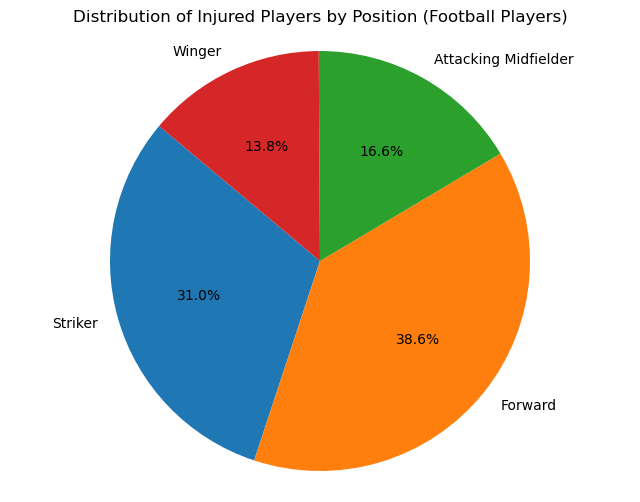

In [3]:
# PieChart on players
players_data = {
    "Striker": {
        "injured": 45,
        "not_injured": 32
    },
    "Forward": {
        "injured": 56,
        "not_injured": 38
    },
    "Attacking Midfielder": {
        "injured": 24,
        "not_injured": 11
    },
    "Winger": {
        "injured": 20,
        "not_injured": 9
    }
}

# Calculate total players
total_players = sum(data["injured"] + data["not_injured"] for data in players_data.values())

# Calculate injured player counts
injured_players = {position: data["injured"] for position, data in players_data.items()}

# Calculate pie chart slice labels
pie_chart_slice_labels = list(injured_players.keys())

# Calculate pie chart slice values (percentages)
pie_chart_slice_values = [value / total_players * 100 for value in injured_players.values()]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Injured Players by Position (Football Players)")
plt.axis("equal")  # Equal aspect ratio 

# Display the chart
plt.show()

Problem 2 

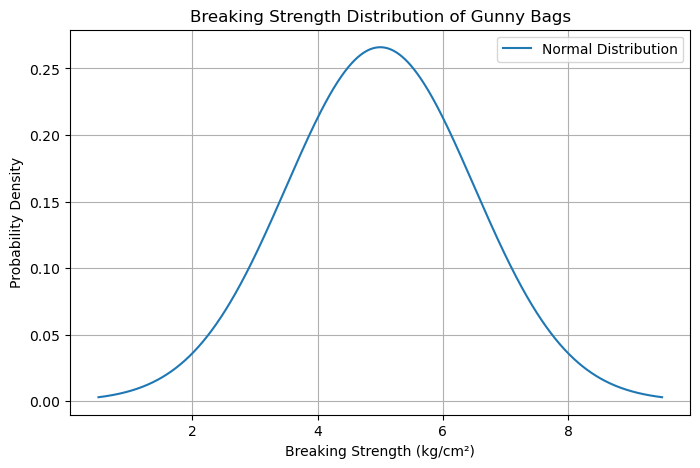

In [6]:
mean = 5
std_dev = 1.5

# Create x-axis values (covering a range of 3 standard deviations below and above the mean)
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)

# Calculate probability density function (PDF) for the normal distribution
y = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Normal Distribution')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density')
plt.title('Breaking Strength Distribution of Gunny Bags')
plt.grid(True)
plt.legend()

plt.show()

**Problem 2 -**

In [41]:
'''Question 2.1-
'''

breaking_strength = 3.17
mu = 5
sigma = 1.5
x = 3.17

# Calculate the Z-score
z = (x - mu) / sigma

# Calculate the CDF
probability = norm.cdf(z)
print(probability)

0.11123243744783456


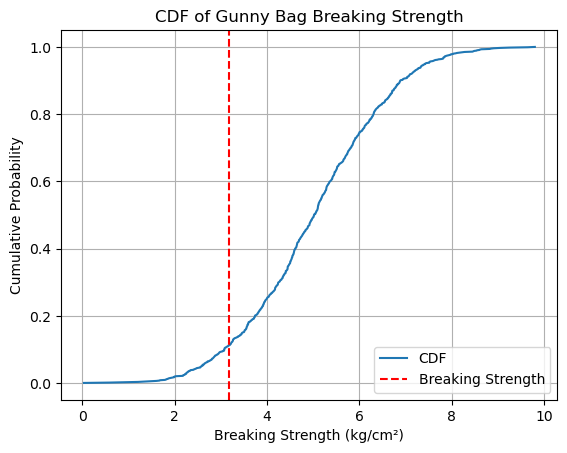

Proportion of gunny bags with breaking strength less than 3.17 kg/cm²: 0.1120


In [17]:
# Parameters
mean = 5
std_dev = 1.5
breaking_strength = 3.17
num_samples = 1000

# Generate random numbers from standard normal distribution
random_numbers = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Sort the random numbers
sorted_numbers = np.sort(random_numbers)

# Calculate the cumulative distribution function (CDF)
cdf = np.arange(1, num_samples + 1) / num_samples

# Find the index of the breaking strength in the sorted array
index = np.searchsorted(sorted_numbers, breaking_strength, side='right')

# Calculate the proportion of gunny bags with breaking strength less than 3.17 kg/cm²
proportion = index / num_samples

# Plot the CDF
plt.plot(sorted_numbers, cdf, label='CDF')
plt.axvline(x=breaking_strength, color='r', linestyle='--', label='Breaking Strength')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Gunny Bag Breaking Strength')
plt.legend()
plt.grid(True)
plt.show()

print(f"Proportion of gunny bags with breaking strength less than {breaking_strength} kg/cm²: {proportion:.4f}")

In [43]:
'''Question 2.2 - 
'''

def cal_prop(mean, std_dev, breaking_strength):

  z_score = (breaking_strength - mean) / std_dev

  # Calculate the cumulative probability of the z-score
  cdf = stats.norm.cdf(z_score)

  # Calculate the proportion of gunny bags with breaking strength greater than or equal to the given value
  proportion = 1 - cdf

  return proportion

# Given values
mean_strength = 5
std_dev_strength = 1.5
min_breaking_strength = 3.6

# Calculate the proportion
proportion = cal_prop(mean_strength, std_dev_strength, min_breaking_strength)

print(f"Proportion of gunny bags with breaking strength at least {min_breaking_strength} kg/cm²: {proportion:.4f}")

Proportion of gunny bags with breaking strength at least 3.6 kg/cm²: 0.8247


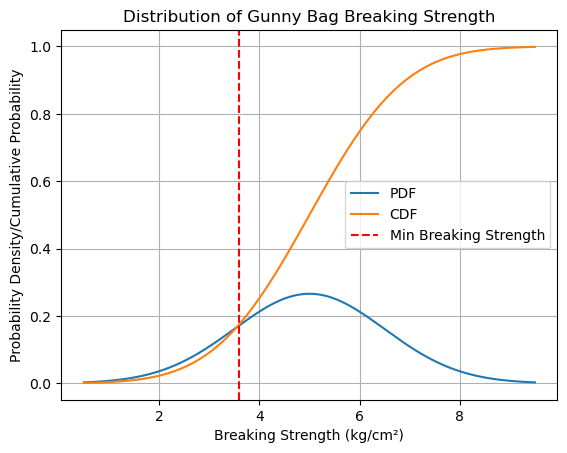

In [21]:
# Parameters
mean = 5
std_dev = 1.5
min_breaking_strength = 3.6
 
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calculate PDF
pdf = norm.pdf(x, mean, std_dev)

# Calculate CDF
cdf = norm.cdf(x, mean, std_dev)

# Plot the PDF and CDF
plt.plot(x, pdf, label='PDF')
plt.plot(x, cdf, label='CDF')
plt.axvline(x=min_breaking_strength, color='r', linestyle='--', label='Min Breaking Strength')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density/Cumulative Probability')
plt.title('Distribution of Gunny Bag Breaking Strength')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
'''Question 2.3 -
'''


def cal_cumulative_probability(z_score):

  # Calculate the cumulative probability
  cumulative_probability = stats.norm.cdf(z_score)

  return cumulative_probability

z_score_value = 0.333

# Calculate the cumulative probability
cumulative_prob = calculate_cumulative_probability(z_score_value)

print(f"The cumulative probability for z = {z_score_value} is: {cumulative_prob:.4f}")

The cumulative probability for z = 0.333 is: 0.6304


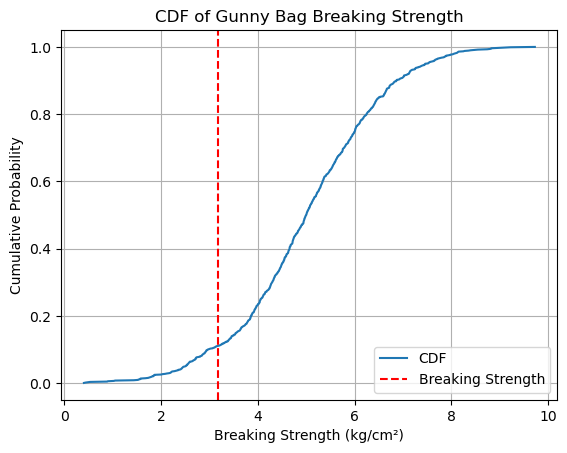

Proportion of gunny bags with breaking strength less than 3.17 kg/cm²: 0.1100


In [6]:
'''Question 2.3 -
'''


mean = 5
std_dev = 1.5
breaking_strength = 3.17
num_samples = 1000

random_numbers = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
# Sort the random numbers
sorted_numbers = np.sort(random_numbers)

# Calculate the cumulative distribution function (CDF)
cdf = np.arange(1, num_samples + 1) / num_samples

# Find the index of the breaking strength in the sorted array
index = np.searchsorted(sorted_numbers, breaking_strength, side='right')

# Calculate the proportion of gunny bags with breaking strength less than 3.17 kg/cm²
proportion = index / num_samples

# Plot the CDF
plt.plot(sorted_numbers, cdf, label='CDF')
plt.axvline(x=breaking_strength, color='r', linestyle='--', label='Breaking Strength')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Gunny Bag Breaking Strength')
plt.legend()
plt.grid(True)
plt.show()

print(f"Proportion of gunny bags with breaking strength less than {breaking_strength} kg/cm²: {proportion:.4f}")


Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg/cm²: 0.1390


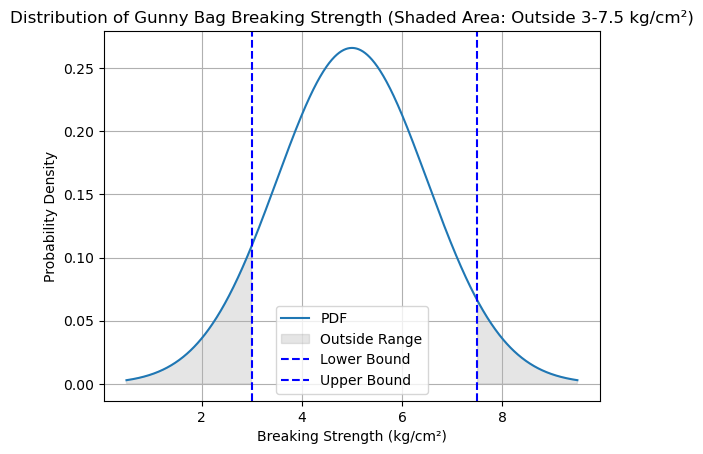

In [15]:
'''Question 2.4 -
'''


# Given values per question
mean_strength = 5
std_dev_strength = 1.5
lower_bound = 3
upper_bound = 7.5

def cal_prop_range(mean, std_dev, lower_bound, upper_bound):
  z_lower = (lower_bound - mean) / std_dev
  z_upper = (upper_bound - mean) / std_dev

  # Calculate the cumulative probabilities for the lower and upper bounds
  cdf_lower = stats.norm.cdf(z_lower)
  cdf_upper = stats.norm.cdf(z_upper)

  # Calculate the proportion within the range
  proportion_within = cdf_upper - cdf_lower

  # Calculate the proportion outside the range
  proportion_outside = 1 - proportion_within

  return proportion_outside
    
x = np.linspace(mean_strength - 3*std_dev_strength, mean_strength + 3*std_dev_strength, 1000)
pdf = norm.pdf(x, mean_strength, std_dev_strength)


# Calculate the proportion
proportion = cal_prop_range(mean_strength, std_dev_strength, lower_bound, upper_bound)

print(f"Proportion of gunny bags with breaking strength NOT between {lower_bound} and {upper_bound} kg/cm²: {proportion:.4f}")


shade_left = lower_bound
shade_right = upper_bound

plt.plot(x, pdf, label='PDF')
plt.fill_between(x, 0, pdf, where=(x < shade_left) | (x > shade_right), color='gray', alpha=0.2, label='Outside Range')
plt.axvline(x=lower_bound, color='b', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='b', linestyle='--', label='Upper Bound')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Probability Density')
plt.title('Distribution of Gunny Bag Breaking Strength (Shaded Area: Outside 3-7.5 kg/cm²)')
plt.legend()
plt.grid(True)
plt.show()


**Problem 3 -**

In [2]:
df = pd.read_csv('C:/Users/risha/Downloads/Zingaro_Company.csv', encoding= 'unicode_escape')

In [5]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [20]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [7]:
#Data - 
mean1 = 134.110527
std1 = 33.041804
n1 = 75

mean2 = 147.788117
std2 = 15.587355
n2 = 75

# Calculate the standard error
SE = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-statistic
z_stat = (mean1 - mean2) / SE

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

Z-Statistic: -3.24223194016839
P-Value: 0.0011859745896689589


In [9]:
mean = 147.7881
stddev = 15.58736
n = 75
mu_0 = 150

# Calculate the standard error
SE = stddev / np.sqrt(n)

# Calculate the z-statistic
z_stat = (mean - mu_0) / SE

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.8f}")

Z-Statistic: -1.2289
P-Value: 0.21910186


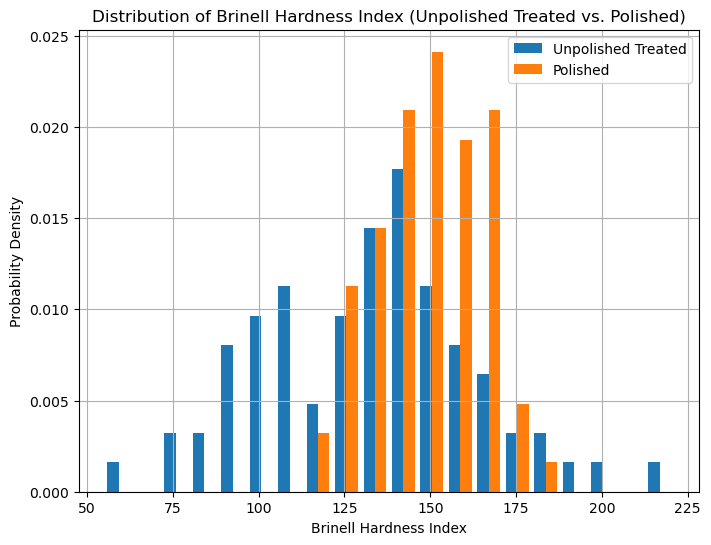

In [11]:
# Sample data (assuming these are the means and standard deviations from the provided data)
means = np.array([134.110527, 147.788117])
stds = np.array([33.041804, 15.587355])

# Sample sizes (assuming equal sample sizes)
sample_sizes = np.array([75, 75])  # Replace with actual sample sizes if known

# Create x-axis labels
labels = ["Unpolished Treated", "Polished"]

# Generate data for normal distributions
x1 = np.random.normal(means[0], stds[0], int(sample_sizes[0]))
x2 = np.random.normal(means[1], stds[1], int(sample_sizes[1]))

# Configure the plot
plt.figure(figsize=(8, 6))
plt.hist([x1, x2], bins=20, label=labels, density=True)  # Use density=True for probability density
plt.xlabel("Brinell Hardness Index")
plt.ylabel("Probability Density")
plt.title("Distribution of Brinell Hardness Index (Unpolished Treated vs. Polished)")
plt.legend()
plt.grid(True)
plt.show()

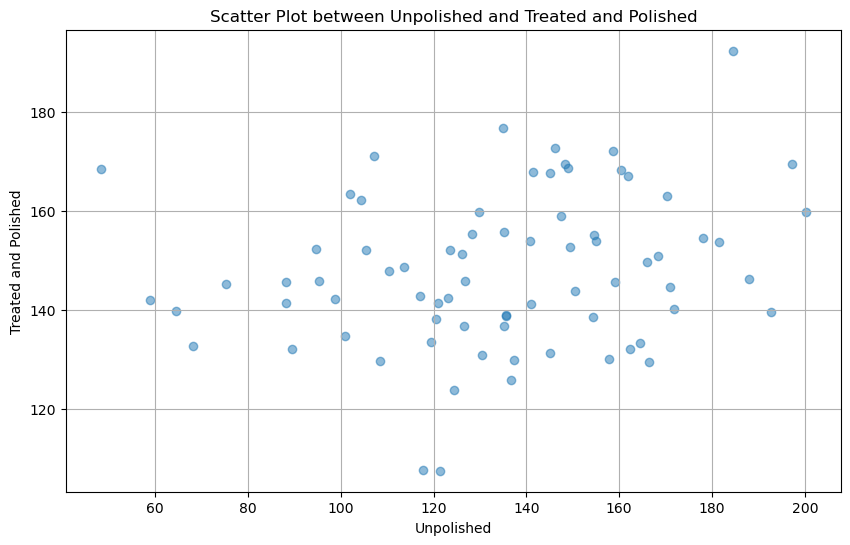

In [6]:
'''Load the Question 3 CSV file into a DataFrame
'''


df = pd.read_csv('C:/Users/risha/Downloads/Zingaro_Company.csv', encoding= 'unicode_escape')

# Select the columns you want to plot
x_column = 'Unpolished'  # Replace with your column name
y_column = 'Treated and Polished'  # Replace with your column name

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot between {x_column} and {y_column}')
plt.grid(True)
plt.show()

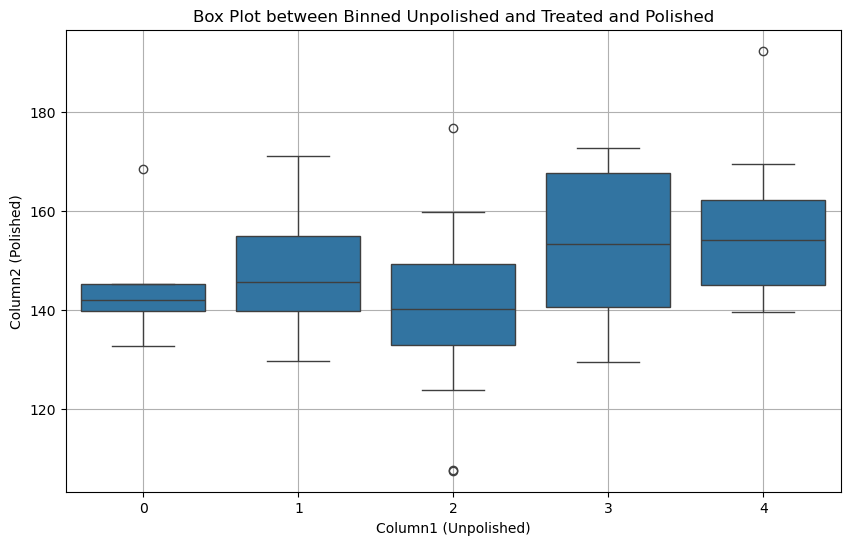

In [29]:
# Assuming 'Column1' is continuous as well
df['Column1_binned'] = pd.cut(df['Unpolished'], bins=5, labels=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Column1_binned', y='Treated and Polished', data=df)
plt.xlabel('Column1 (Unpolished)')
plt.ylabel('Column2 (Polished)')
plt.title(f'Box Plot between Binned {x_column} and {y_column}')
plt.grid(True)
plt.show()

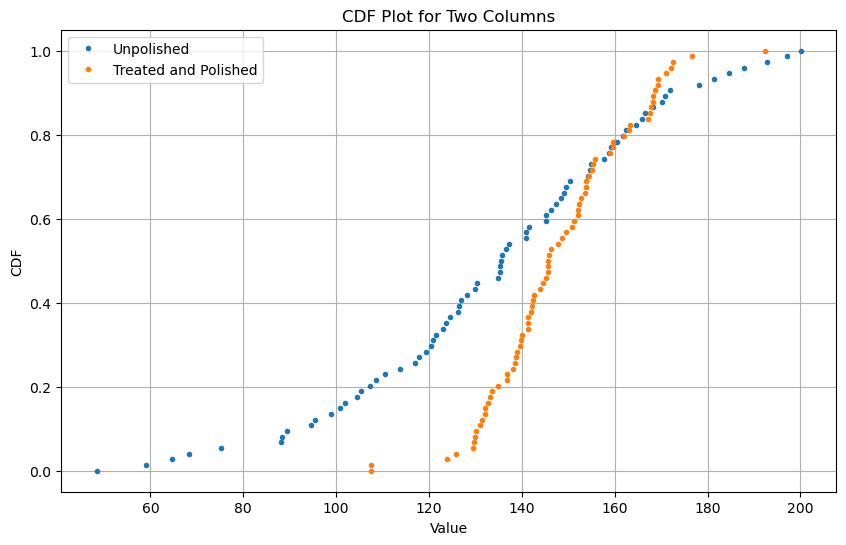

In [8]:
column1 = 'Unpolished'  # Replace with your column name
column2 = 'Treated and Polished'  # Replace with your column name

# Calculate the CDF for the first column
df_sorted1 = df[column1].sort_values()
cdf1 = np.arange(len(df_sorted1)) / float(len(df_sorted1) - 1)

# Calculate the CDF for the second column
df_sorted2 = df[column2].sort_values()
cdf2 = np.arange(len(df_sorted2)) / float(len(df_sorted2) - 1)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(df_sorted1, cdf1, marker='.', linestyle='none', label=column1)
plt.plot(df_sorted2, cdf2, marker='.', linestyle='none', label=column2)
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF Plot for Two Columns')
plt.legend()
plt.grid(True)
plt.show()

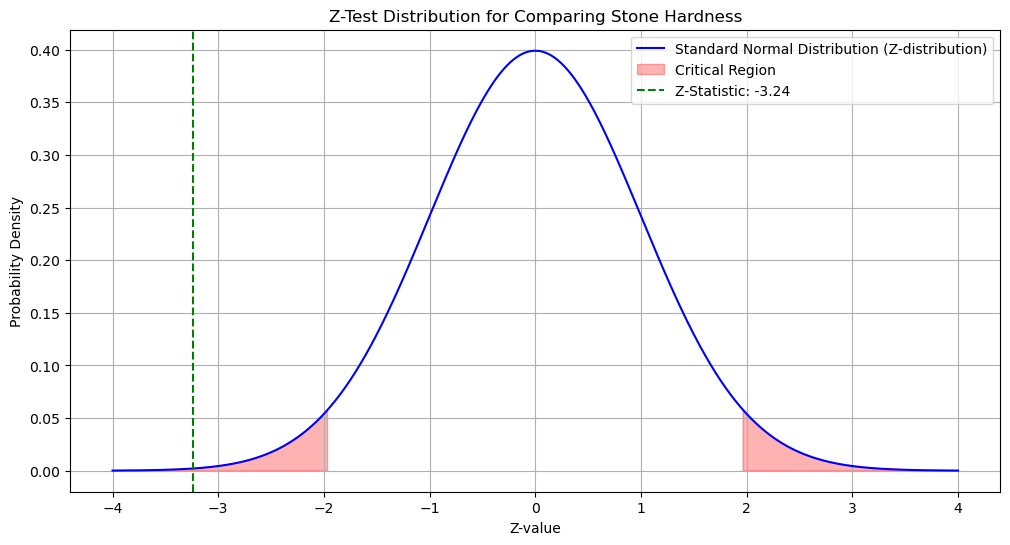

In [46]:
'''Question 3.1 -
'''

# Given data
mean_unpolished = 134.110527
stddev_unpolished = 33.041804
n_unpolished = 75

mean_polished = 147.788117
stddev_polished = 15.587355
n_polished = 75
# Significance level
alpha = 0.05

# Calculate the Z-Statistic
pooled_stddev = np.sqrt((stddev_unpolished**2 / n_unpolished) + (stddev_polished**2 / n_polished))
z_stat = (mean_unpolished - mean_polished) / pooled_stddev

# Generate the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

# Critical Z-values for two-tailed test
critical_value = stats.norm.ppf(1 - alpha / 2)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Standard Normal Distribution (Z-distribution)', color='blue')

# Shade the critical regions
plt.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.3, label='Critical Region')

# Mark the Z-Statistic
plt.axvline(z_stat, color='green', linestyle='--', label=f'Z-Statistic: {z_stat:.2f}')

# Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Z-Test Distribution for Comparing Stone Hardness')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [63]:
'''Question 3.2 -
'''

# Given data
mean_unpolished = 134.110527
stddev_unpolished = 33.041804
n_unpolished = 75

mean_polished = 147.788117
stddev_polished = 15.587355
n_polished = 75

# Calculate the pooled standard deviation
s_p = np.sqrt(((n_unpolished - 1) * stddev_unpolished**2 + (n_polished - 1) * stddev_polished**2) / (n_unpolished + n_polished - 2))

# Calculate the standard error
SE = s_p * np.sqrt(1 / n_unpolished + 1 / n_polished)

# Calculate the t-statistic
t_stat = (mean_unpolished - mean_polished) / SE

# Degrees of freedom
df = n_unpolished + n_polished - 2

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.12f}")


T-Statistic: -3.2422
P-Value: 0.001465515547


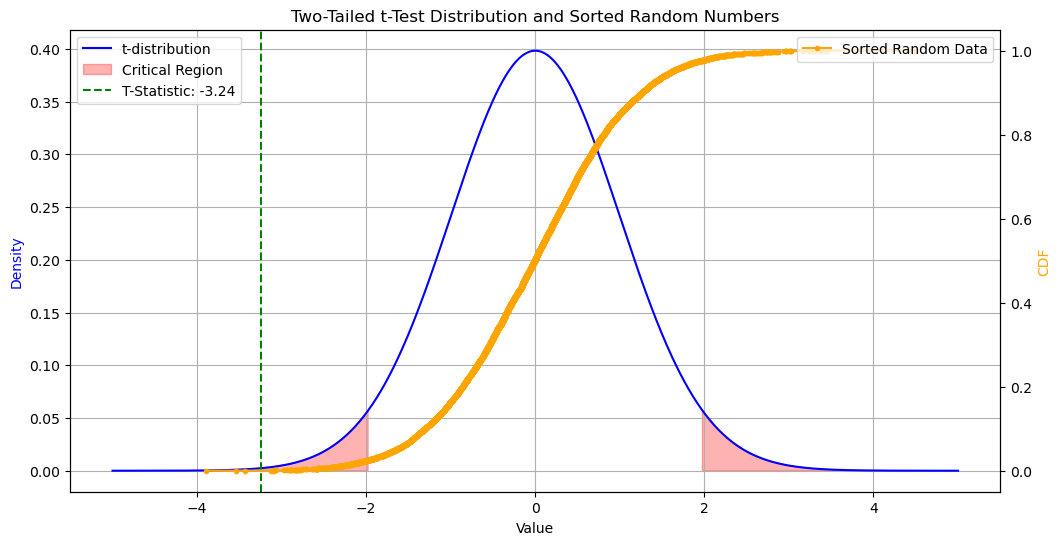

In [48]:

# Parameters for the t-test
t_stat = -3.24
df = 148
alpha = 0.05

# Generate random numbers from standard normal distribution
n = 10000  # Number of random samples
random_data = np.random.randn(n)
sorted_random_data = np.sort(random_data)

# Generate t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df=df)

# Critical t-values for two-tailed test
critical_value = stats.t.ppf(1 - alpha / 2, df=df)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the t-distribution
ax1.plot(x, y, label='t-distribution', color='blue')
ax1.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.3, label='Critical Region')
ax1.axvline(t_stat, color='green', linestyle='--', label=f'T-Statistic: {t_stat:.2f}')

# Plot the sorted random data on the same graph
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(sorted_random_data, np.linspace(0, 1, n), marker='o', linestyle='-', color='orange', markersize=3, label='Sorted Random Data')

ax1.set_xlabel('Value')
ax1.set_ylabel('Density', color='blue')
ax2.set_ylabel('CDF', color='orange')
ax1.set_title('Two-Tailed t-Test Distribution and Sorted Random Numbers')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.show()


**PROBLEM 4 -**

In [10]:
df_2 = pd.read_csv('C:/Users/risha/Downloads/Dental+Hardness+data.csv', encoding= 'unicode_escape')

In [12]:
df_2.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [14]:
df_2.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


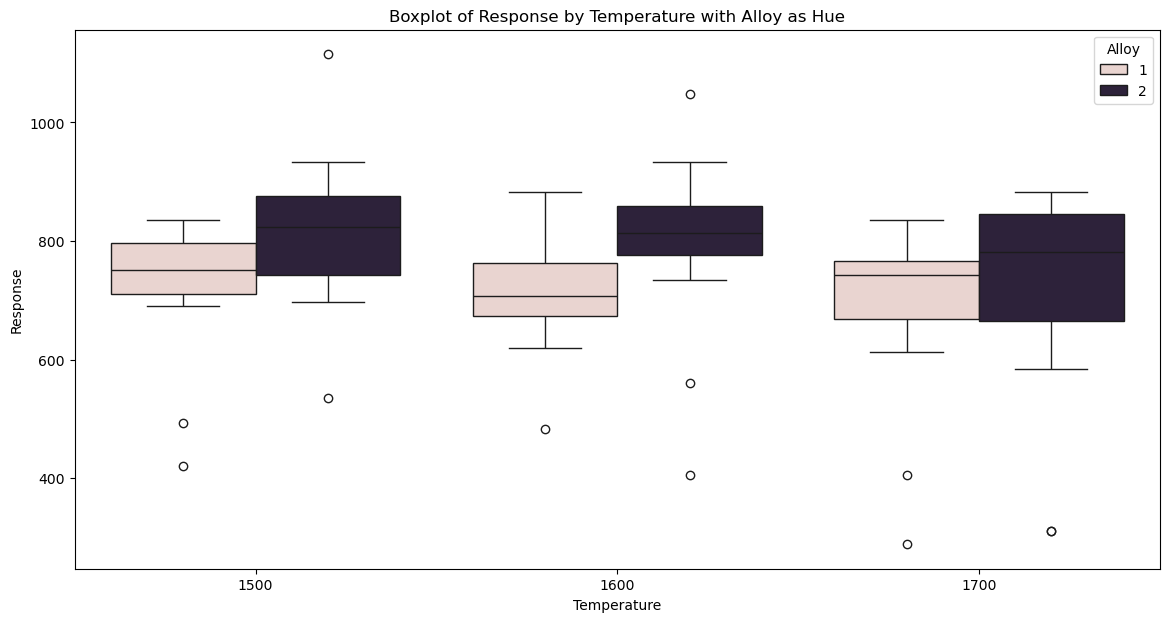

In [20]:
#Boxplot with Hue as Alloy

# Melt the DataFrame to long format for the boxplot
df_melted = pd.melt(df_2, id_vars=['Dentist', 'Method', 'Temp'], value_vars=['Response'], var_name='Measurement', value_name='Value')

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(df_2, x='Temp', y='Response', hue='Alloy')

# Add title and labels
plt.title('Boxplot of Response by Temperature with Alloy as Hue')
plt.xlabel('Temperature')
plt.ylabel('Response')

# Show plot
plt.legend(title='Alloy')
plt.show()


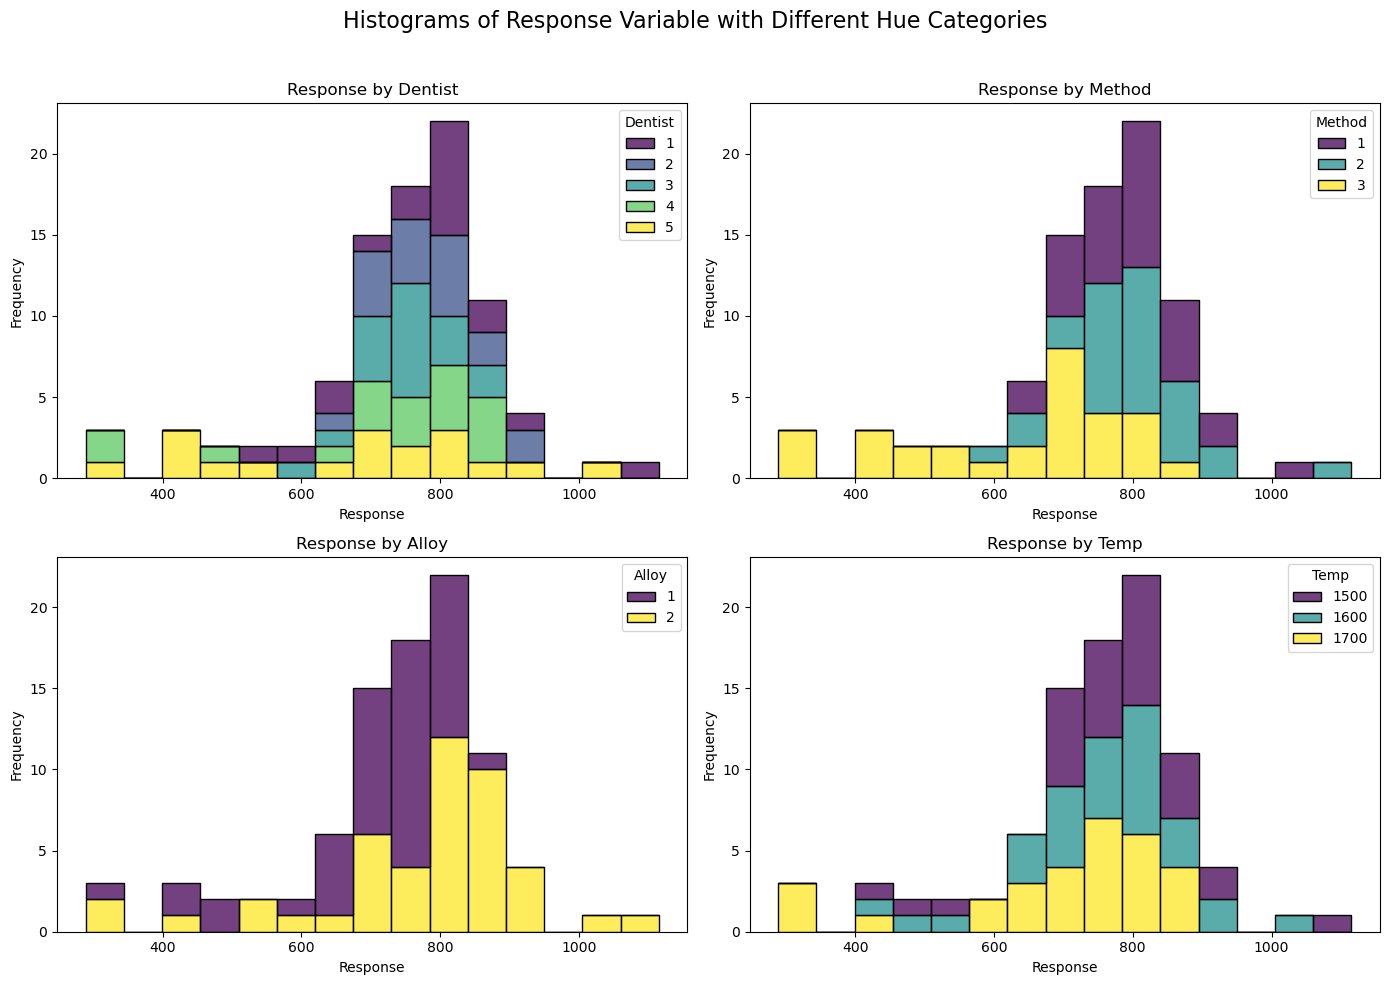

In [24]:

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=False)
fig.suptitle('Histograms of Response Variable with Different Hue Categories', fontsize=16)

# Plot histograms
sns.histplot(df_2, x='Response', hue='Dentist', multiple='stack', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Response by Dentist')
axes[0, 0].set_xlabel('Response')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df_2, x='Response', hue='Method', multiple='stack', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Response by Method')
axes[0, 1].set_xlabel('Response')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df_2, x='Response', hue='Alloy', multiple='stack', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Response by Alloy')
axes[1, 0].set_xlabel('Response')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df_2, x='Response', hue='Temp', multiple='stack', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Response by Temp')
axes[1, 1].set_xlabel('Response')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Descriptive Statistics by Dentist:
         count        mean         std    min     25%    50%     75%     max
Dentist                                                                     
1         18.0  783.055556  129.281486  560.0  711.50  792.0  835.00  1115.0
2         18.0  786.666667   77.431564  673.0  719.75  787.0  832.25   933.0
3         18.0  748.611111   69.725629  613.0  717.25  743.0  805.25   858.0
4         18.0  713.666667  178.209064  289.0  694.25  767.0  813.00   894.0
5         18.0  676.888889  206.468881  312.0  496.25  711.0  818.75  1048.0


C:\Users\risha\AppData\Local\Temp\ipykernel_16316\1935817643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dentist', y='Response', data=df_2, palette='viridis')


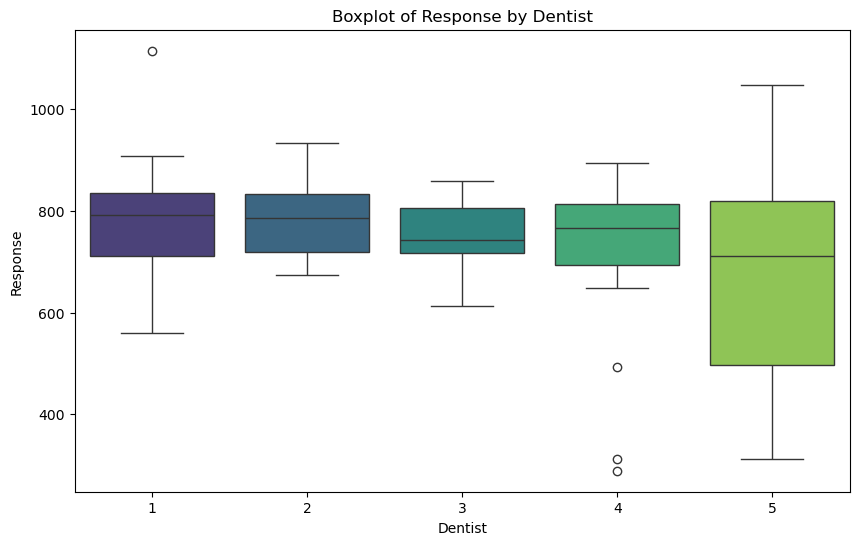

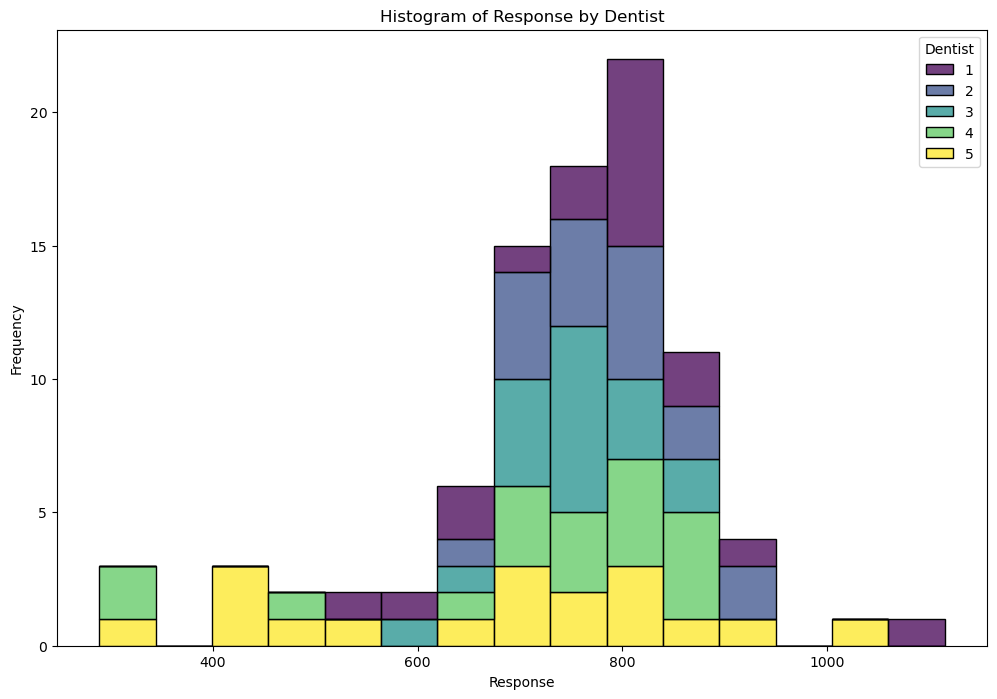

ANOVA F-value: 1.93
ANOVA p-value: 0.1121
There is no statistically significant difference in hardness (Response) between dentists.


In [26]:
# Histogram visualization
plt.figure(figsize=(12, 8))
sns.histplot(df_2, x='Response', hue='Dentist', multiple='stack', palette='viridis', bins=15)
plt.title('Histogram of Response by Dentist')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

# Statistical testing: ANOVA
f_val, p_val = stats.f_oneway(
    *[df_2[df_2['Dentist'] == d]['Response'] for d in df_2['Dentist'].unique()]
)
print(f'ANOVA F-value: {f_val:.2f}')
print(f'ANOVA p-value: {p_val:.4f}')

# Interpretation
if p_val < 0.05:
    print("The differences in hardness (Response) between dentists are statistically significant.")
else:
    print("There is no statistically significant difference in hardness (Response) between dentists.")



Analyzing Alloy 1

Descriptive Statistics by Dentist:
         count        mean         std    min    25%    50%    75%    max
Dentist                                                                  
1          9.0  749.888889   72.954514  620.0  698.0  782.0  792.0  835.0
2          9.0  761.222222   53.391895  673.0  715.0  772.0  803.0  835.0
3          9.0  717.555556   64.569945  613.0  681.0  743.0  743.0  813.0
4          9.0  681.111111  180.683732  289.0  690.0  743.0  772.0  882.0
5          9.0  627.666667  149.867441  405.0  483.0  698.0  715.0  803.0

Normality Test p-values by Dentist:
Dentist
1    0.325469
2    0.841544
3    0.129536
4    0.053337
5    0.081278
Name: Response, dtype: float64

Levene's Test p-value: 0.2566

ANOVA F-value: 1.98
ANOVA p-value: 0.1166
There is no statistically significant difference in hardness (Response) between dentists.

Analyzing Alloy 2

Descriptive Statistics by Dentist:
         count        mean         std    min    25%    50%   

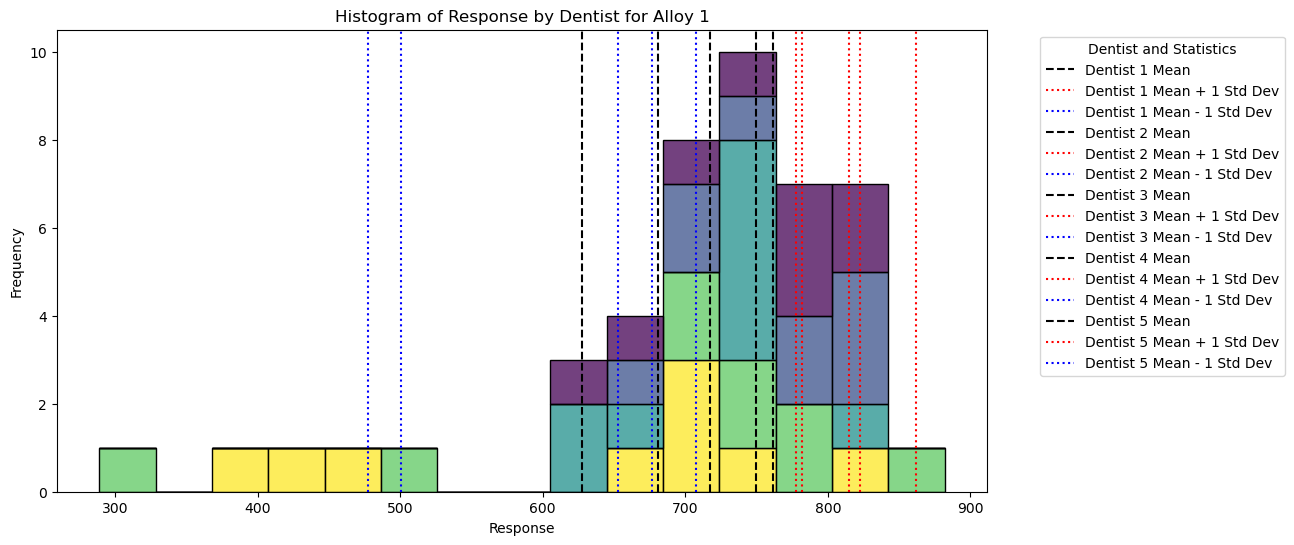

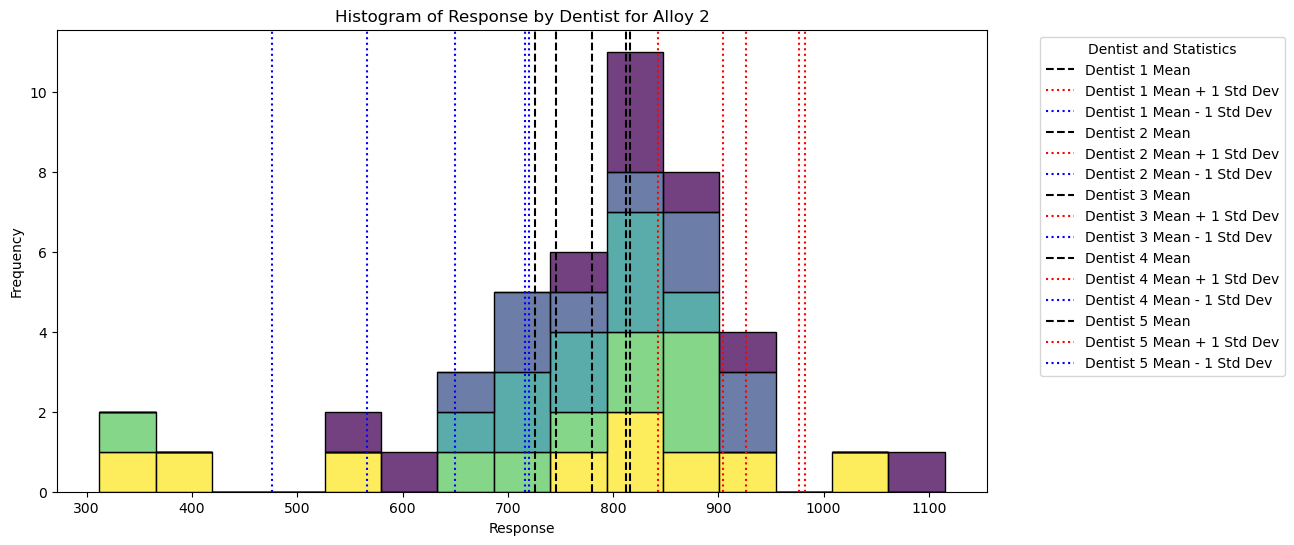

In [36]:
'''Question 4.1
'''

# Separate analysis for each alloy
for alloy in df_2['Alloy'].unique():
    print(f"\nAnalyzing Alloy {alloy}")

    # Filter data for the current alloy
    df_alloy = df_2[df_2['Alloy'] == alloy]

    # Descriptive statistics
    descriptive_stats = df_alloy.groupby('Dentist')['Response'].describe()
    print("\nDescriptive Statistics by Dentist:")
    print(descriptive_stats)

    # Normality Test
    normality_tests = df_alloy.groupby('Dentist')['Response'].apply(lambda x: stats.shapiro(x)[1])
    print("\nNormality Test p-values by Dentist:")
    print(normality_tests)

    # Homogeneity of Variances Test
    _, levene_p = stats.levene(*[df_alloy[df_alloy['Dentist'] == d]['Response'] for d in df_alloy['Dentist'].unique()])
    print(f"\nLevene's Test p-value: {levene_p:.4f}")

    # ANOVA Test
    f_val, p_val = stats.f_oneway(*[df_alloy[df_alloy['Dentist'] == d]['Response'] for d in df_alloy['Dentist'].unique()])
    print(f"\nANOVA F-value: {f_val:.2f}")
    print(f"ANOVA p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("The differences in hardness (Response) between dentists are statistically significant.")
        # Post-hoc pairwise comparisons (Tukey's HSD)
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey = pairwise_tukeyhsd(df_alloy['Response'], df_alloy['Dentist'])
        print("\nPairwise Comparisons:")
        print(tukey)
    else:
        print("There is no statistically significant difference in hardness (Response) between dentists.")

# Plotting
for alloy in df_2['Alloy'].unique():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2[df_2['Alloy'] == alloy], x='Response', hue='Dentist', multiple='stack', palette='viridis', bins=15)

    # Calculate and plot mean and standard deviation lines for each dentist
    for dentist in df_2['Dentist'].unique():
        dentist_data = df_2[(df_2['Alloy'] == alloy) & (df_2['Dentist'] == dentist)]['Response']
        mean = dentist_data.mean()
        std_dev = dentist_data.std()

        # Plot mean line
        plt.axvline(mean, color='black', linestyle='--', label=f'Dentist {dentist} Mean')
        # Plot standard deviation lines
        plt.axvline(mean + std_dev, color='red', linestyle=':', label=f'Dentist {dentist} Mean + 1 Std Dev')
        plt.axvline(mean - std_dev, color='blue', linestyle=':', label=f'Dentist {dentist} Mean - 1 Std Dev')

    plt.title(f'Histogram of Response by Dentist for Alloy {alloy}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.legend(title='Dentist and Statistics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



Analyzing Alloy 1

Descriptive Statistics by Method:
        count        mean         std    min    25%    50%    75%    max
Method                                                                  
1        15.0  751.133333   52.370748  627.0  715.0  752.0  792.0  813.0
2        15.0  745.000000   68.903659  613.0  694.0  752.0  782.0  882.0
3        15.0  626.333333  167.532371  289.0  488.0  681.0  743.0  835.0

Normality Test p-values by Method:
Method
1    0.181986
2    0.903033
3    0.142548
Name: Response, dtype: float64

Levene's Test p-value: 0.0034

ANOVA F-value: 6.26
ANOVA p-value: 0.0042
The differences in hardness (Response) between Methods are statistically significant.


C:\Users\risha\AppData\Local\Temp\ipykernel_13012\1543917632.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = df_alloy.groupby('Method')['Response'].describe()
C:\Users\risha\AppData\Local\Temp\ipykernel_13012\1543917632.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normality_tests = df_alloy.groupby('Method')['Response'].apply(lambda x: stats.shapiro(x)[1])



Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------

Analyzing Alloy 2

Descriptive Statistics by Method:
        count        mean         std    min    25%    50%    75%     max
Method                                                                   
1        15.0  836.666667   93.953383  649.0  782.0  858.0  888.0  1048.0
2        15.0  863.666667   81.901218  782.0  824.0  835.0  870.0  1115.0
3        15.0  627.866667  173.590597  312.0  548.0  681.0  724.5   847.0

Normality Test p-values by Method:
Method
1    0.758239
2    0.001051
3    0.102590
Name: Response, dtype: float64

Levene's Test p-value: 0.0447

ANOVA 

C:\Users\risha\AppData\Local\Temp\ipykernel_13012\1543917632.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = df_alloy.groupby('Method')['Response'].describe()
C:\Users\risha\AppData\Local\Temp\ipykernel_13012\1543917632.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normality_tests = df_alloy.groupby('Method')['Response'].apply(lambda x: stats.shapiro(x)[1])



Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


NameError: name 'Dentist' is not defined

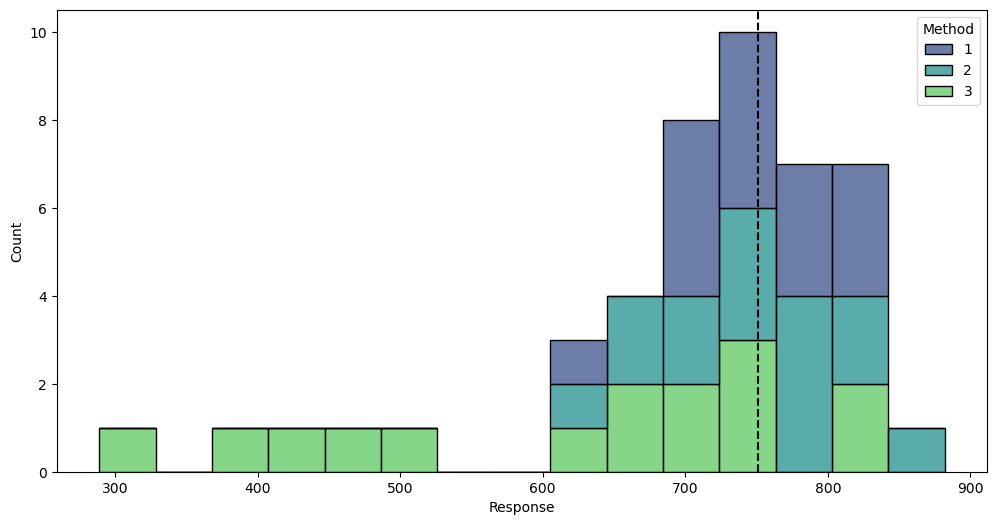

In [53]:
'''Question 4.2
'''

# Separate analysis for each alloy
for alloy in df_2['Alloy'].unique():
    print(f"\nAnalyzing Alloy {alloy}")

    # Filter data for the current alloy
    df_alloy = df_2[df_2['Alloy'] == alloy]

    # Descriptive statistics
    descriptive_stats = df_alloy.groupby('Method')['Response'].describe()
    print("\nDescriptive Statistics by Method:")
    print(descriptive_stats)

    # Normality Test
    normality_tests = df_alloy.groupby('Method')['Response'].apply(lambda x: stats.shapiro(x)[1])
    print("\nNormality Test p-values by Method:")
    print(normality_tests)

    # Homogeneity of Variances Test
    _, levene_p = stats.levene(*[df_alloy[df_alloy['Method'] == d]['Response'] for d in df_alloy['Method'].unique()])
    print(f"\nLevene's Test p-value: {levene_p:.4f}")

    # ANOVA Test
    f_val, p_val = stats.f_oneway(*[df_alloy[df_alloy['Method'] == d]['Response'] for d in df_alloy['Method'].unique()])
    print(f"\nANOVA F-value: {f_val:.2f}")
    print(f"ANOVA p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("The differences in hardness (Response) between Methods are statistically significant.")
        # Post-hoc pairwise comparisons (Tukey's HSD)
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey = pairwise_tukeyhsd(df_alloy['Response'], df_alloy['Method'])
        print("\nPairwise Comparisons:")
        print(tukey)
    else:
        print("There is no statistically significant difference in hardness (Response) between Methods.")

# Plotting
for alloy in df_2['Alloy'].unique():
    plt.figure(figsize=(12, 6))
    sns.histplot(df_2[df_2['Alloy'] == alloy], x='Response', hue='Method', multiple='stack', palette='viridis', bins=15)

    # Calculate and plot mean and standard deviation lines for each dentist
    for Method in df_2['Method'].unique():
        Method_data = df_2[(df_2['Alloy'] == alloy) & (df_2['Method'] == Method)]['Response']
        mean = Method_data.mean()
        std_dev = Method_data.std()

        # Plot mean line
        plt.axvline(mean, color='black', linestyle='--', label=f'Method{Method} Mean')
        # Plot standard deviation lines
        plt.axvline(mean + std_dev, color='red', linestyle=':', label=f'Method {Dentist} Mean + 1 Std Dev')
        plt.axvline(mean - std_dev, color='blue', linestyle=':', label=f'Method {Dentist} Mean - 1 Std Dev')

    plt.title(f'Histogram of Response by Method for Alloy {alloy}')
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.legend(title='Method and Statistics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

                 sum_sq    df         F        PR(>F)
C(Method)  5.934275e+05   2.0  19.89268  7.683892e-08
Residual   1.297668e+06  87.0       NaN           NaN


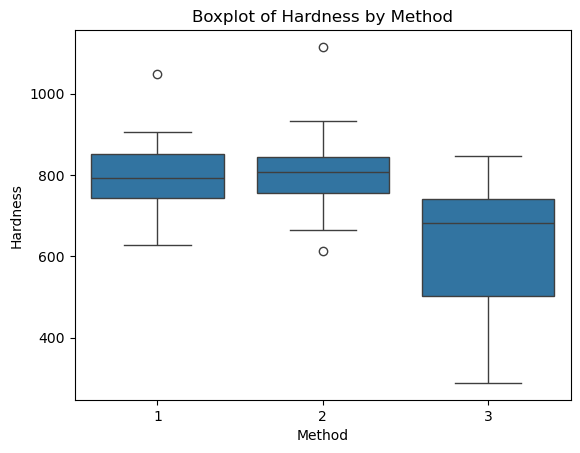

In [48]:
#Question 4.2
# Perform ANOVA
model = smf.ols('Response ~ C(Method)', data=df_2).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

# Visualization
sns.boxplot(x='Method', y='Response', data=df_2)
plt.title('Boxplot of Hardness by Method')
plt.xlabel('Method')
plt.ylabel('Hardness')
plt.show()



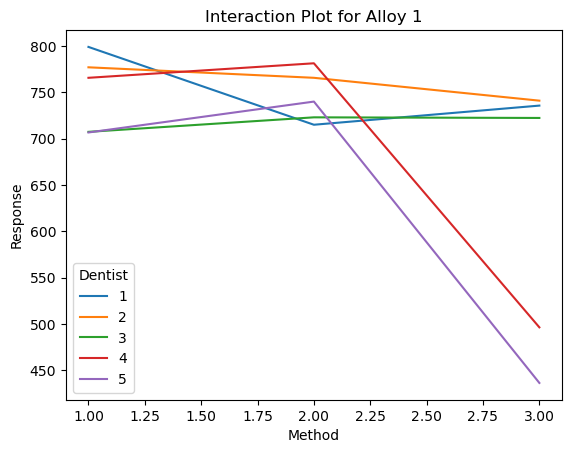

In [37]:
'''Question 4.3 -
'''

# Filter data for Alloy 1
df_alloy1 = df_2[df_2['Alloy'] == 1]

# Group data by Dentist and Method, calculating mean Response
grouped_data = df_alloy1.groupby(['Dentist', 'Method'])['Response'].mean().reset_index()

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='Method', columns='Dentist', values='Response')

# Create the interaction plot
pivot_data.plot(kind='line')
plt.title('Interaction Plot for Alloy 1')
plt.xlabel('Method')
plt.ylabel('Response')
plt.show()

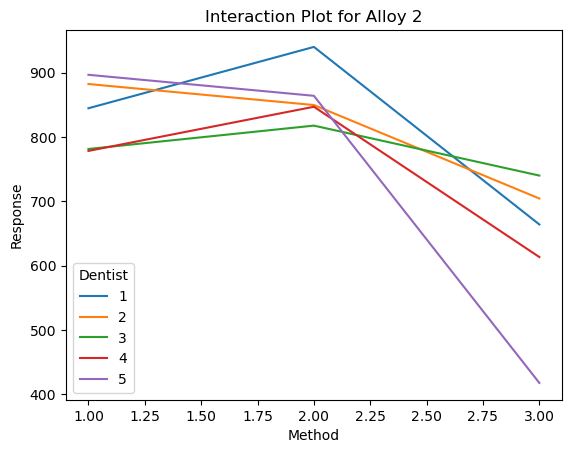

In [41]:
'''Question 4.3 -
'''

# Filter data for Alloy 2
df_alloy2 = df_2[df_2['Alloy'] == 2]

# Group data by Dentist and Method, calculating mean Response
grouped_data = df_alloy2.groupby(['Dentist', 'Method'])['Response'].mean().reset_index()

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='Method', columns='Dentist', values='Response')

# Create the interaction plot
pivot_data.plot(kind='line')
plt.title('Interaction Plot for Alloy 2')
plt.xlabel('Method')
plt.ylabel('Response')
plt.show()

In [83]:
'''Queston 4.4 -
'''


#Two way anova for alloy 1 and 2

from statsmodels.formula.api import ols
from scipy.stats import f, levene

def two_way_anova_manual(df_2, alloy):
    
    # Filter data for the specific alloy
    df_alloy = df_2[df_2['Alloy'] == alloy]
    dentists = df_alloy['Dentist'].unique()
    methods = df_alloy['Method'].unique()

    # Calculate group means and overall mean
    grand_mean = df_alloy['Response'].mean()
    group_means_dentist = df_alloy.groupby('Dentist')['Response'].mean().values
    group_means_method = df_alloy.groupby('Method')['Response'].mean().values
    group_means_interaction = df_alloy.groupby(['Dentist', 'Method'])['Response'].mean().unstack().values

    # Calculate SS
    ss_total = sum((df_alloy['Response'] - grand_mean) ** 2)
    ss_dentist = sum(df_alloy.groupby('Dentist').size() * (group_means_dentist - grand_mean) ** 2)
    ss_method = sum(df_alloy.groupby('Method').size() * (group_means_method - grand_mean) ** 2)

    # Calculating interaction sum of squares correctly:
    interaction_size = df_alloy.groupby(['Dentist', 'Method']).size().unstack().values
    ss_interaction = np.sum(interaction_size * 
                         (group_means_interaction - group_means_dentist[:, np.newaxis] - 
                          group_means_method[np.newaxis, :] + grand_mean) ** 2)

    ss_residual = ss_total - ss_dentist - ss_method - ss_interaction

    # Calculate degrees of freedom
    df_total = len(df_alloy) - 1
    df_dentist = len(dentists) - 1
    df_method = len(methods) - 1
    df_interaction = df_dentist * df_method
    df_residual = df_total - df_dentist - df_method - df_interaction

    # Calculate mean squares
    ms_dentist = ss_dentist / df_dentist
    ms_method = ss_method / df_method
    ms_interaction = ss_interaction / df_interaction
    ms_residual = ss_residual / df_residual

    # Calculate F-values
    f_dentist = ms_dentist / ms_residual
    f_method = ms_method / ms_residual
    f_interaction = ms_interaction / ms_residual

    # Calculate p-values
    p_dentist = 1 - f.cdf(f_dentist, df_dentist, df_residual)
    p_method = 1 - f.cdf(f_method, df_method, df_residual)
    p_interaction = 1 - f.cdf(f_interaction, df_interaction, df_residual)

    # Print ANOVA results
    print(f"ANOVA results for Alloy {alloy}:\n")
    print(f"Source         SS          df         MS          F           p-value")
    print(f"Dentist    {ss_dentist:.2f}    {df_dentist}    {ms_dentist:.2f}    {f_dentist:.2f}    {p_dentist:.4f}")
    print(f"Method     {ss_method:.2f}    {df_method}    {ms_method:.2f}    {f_method:.2f}    {p_method:.4f}")
    print(f"Interaction {ss_interaction:.2f}    {df_interaction}    {ms_interaction:.2f}    {f_interaction:.2f}    {p_interaction:.4f}")
    print(f"Residual   {ss_residual:.2f}    {df_residual}    {ms_residual:.2f}\n")
    print(f"Total      {ss_total:.2f}    {df_total}\n")

    # Perform Levene's test for homogeneity of variances
    groups = [df_alloy['Response'][df_alloy['Dentist'] == dentist].values for dentist in dentists]
    levene_stat, levene_p = levene(*groups)
    print(f"Levene's test for homogeneity of variances:\n Statistic={levene_stat:.2f}, p-value={levene_p:.4f}\n")

# Perform ANOVA for Alloy 1
two_way_anova_manual(df_2, 1)

# Perform ANOVA for Alloy 2
two_way_anova_manual(df_2, 2)


ANOVA results for Alloy 1:

Source         SS          df         MS          F           p-value
Dentist    2022.22    2    1011.11    -7.96    1.0000
Method     1075.56    1    1075.56    -8.47    1.0000
Interaction 438.89    2    219.44    -1.73    1.0000
Residual   -381.11    3    -127.04

Total      3155.56    8

Levene's test for homogeneity of variances:
 Statistic=0.14, p-value=0.8697

ANOVA results for Alloy 2:

Source         SS          df         MS          F           p-value
Dentist    155.56    2    77.78    0.18    0.8453
Method     67.22    1    67.22    0.15    0.7212
Interaction 87.22    2    43.61    0.10    0.9080
Residual   1312.22    3    437.41

Total      1622.22    8

Levene's test for homogeneity of variances:
 Statistic=0.38, p-value=0.7023



C:\Users\risha\AppData\Local\Temp\ipykernel_13012\2378941678.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_2.groupby(['Dentist', 'Method'])['Response'].mean().unstack()
C:\Users\risha\AppData\Local\Temp\ipykernel_13012\2378941678.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ss_within = df_2.groupby(['Dentist', 'Method'])['Response'].apply(lambda x: ((x - x.mean()) ** 2).sum()).sum()


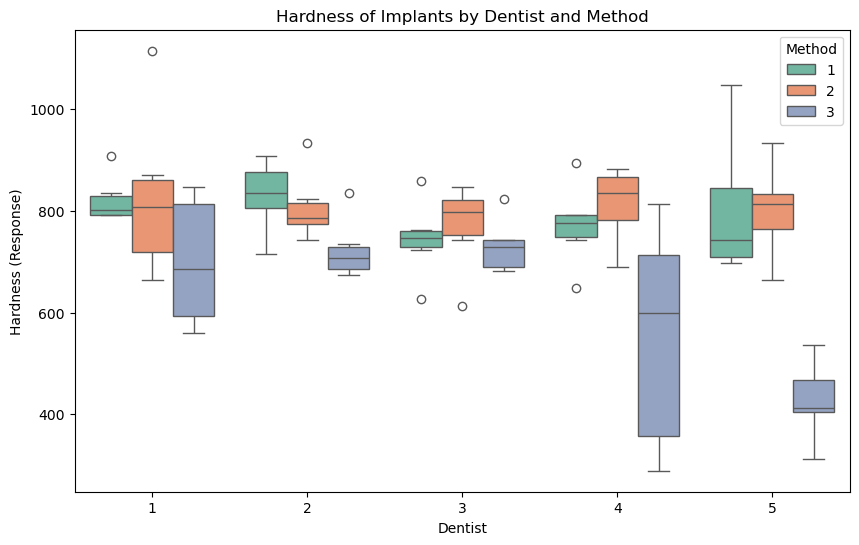

In [55]:
# Convert 'Dentist' and 'Method' to categorical variables
df_2['Dentist'] = df_2['Dentist'].astype('category')
df_2['Method'] = df_2['Method'].astype('category')

# Calculate means for each combination of Dentist and Method
group_means = df_2.groupby(['Dentist', 'Method'])['Response'].mean().unstack()

# Calculate the grand mean
grand_mean = df_2['Response'].mean()

# Calculate sums of squares
ss_total = ((df_2['Response'] - grand_mean) ** 2).sum()
ss_within = df_2.groupby(['Dentist', 'Method'])['Response'].apply(lambda x: ((x - x.mean()) ** 2).sum()).sum()
ss_between = ss_total - ss_within

# Calculate degrees of freedom
df_total = len(df_2) - 1
df_within = df_total - (df_2['Dentist'].nunique() * df_2['Method'].nunique() - 1)
df_between = (df_2['Dentist'].nunique() - 1) + (df_2['Method'].nunique() - 1) - (df_2['Dentist'].nunique() - 1) * (df_2['Method'].nunique() - 1)

# Mean squares
ms_between = ss_between / df_between
ms_within = ss_within / df_within

# F-statistic
f_statistic = ms_between / ms_within

# p-value
p_value = stats.f.sf(f_statistic, df_between, df_within)


# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dentist', y='Response', hue='Method', data=df_2, palette="Set2")
plt.title('Hardness of Implants by Dentist and Method')
plt.xlabel('Dentist')
plt.ylabel('Hardness (Response)')
plt.legend(title='Method')
plt.show()
